## Plant Disease Prediction with CNN

### Seeding for reproducibility

In [ ]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

### Importinmg the dependencies

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

### Data Curation

#### Upload kaggle datatset

In [ ]:
!pip install kaggle

In [ ]:
kaggle_credentials = json.load(open('kaggle.json'))

In [ ]:
#setup kaggle api as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

100% 2.04G/2.04G [01:31<00:00, 25.1MB/s]
100% 2.04G/2.04G [01:31<00:00, 23.8MB/s]


In [ ]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [ ]:
#Unzip the downloaded dataset
with ZipFile('plantvillage-dataset.zip','r') as zip_ref:
    zip_ref.extractall()

In [ ]:
print(os.listdir('plantvillage dataset'))

print(len(os.listdir('plantvillage dataset/segmented')))
print(os.listdir('plantvillage dataset/segmented')[:5])

print(len(os.listdir('plantvillage dataset/color')))
print(os.listdir('plantvillage dataset/color')[:5])

print(len(os.listdir('plantvillage dataset/grayscale')))
print(os.listdir('plantvillage dataset/grayscale')[:5])

['grayscale', 'segmented', 'color']
38
['Tomato___Late_blight', 'Strawberry___healthy', 'Tomato___Early_blight', 'Grape___healthy', 'Grape___Black_rot']
38
['Tomato___Late_blight', 'Strawberry___healthy', 'Tomato___Early_blight', 'Grape___healthy', 'Grape___Black_rot']
38
['Tomato___Late_blight', 'Strawberry___healthy', 'Tomato___Early_blight', 'Grape___healthy', 'Grape___Black_rot']


#### No of Classes = 38

In [ ]:
print(len(os.listdir('plantvillage dataset/color/Grape___healthy')))
print(os.listdir('plantvillage dataset/color/Grape___healthy')[:5])

423
['452823c1-22d2-4bce-a4cc-8ad014421261___Mt.N.V_HL 6199.JPG', '75ad9d58-7f7e-4a4c-8ced-fec8d23d9a7e___Mt.N.V_HL 6170.JPG', '43256f66-6c1c-41f7-9505-890ed9dbf4c2___Mt.N.V_HL 8980.JPG', '3c75e76c-2e1f-478f-aadc-f3decb68c9b0___Mt.N.V_HL 6108.JPG', '2ba70e62-f225-475a-9449-a7fe5f11a59c___Mt.N.V_HL 6074.JPG']


### Data Preprocessing

In [ ]:
#dataset path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


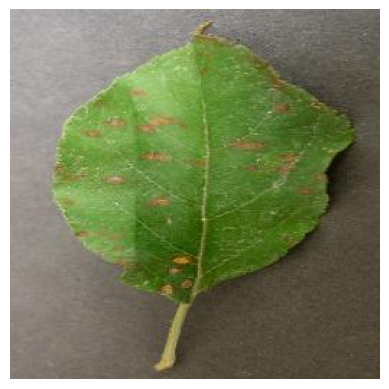

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

(256, 256, 3)


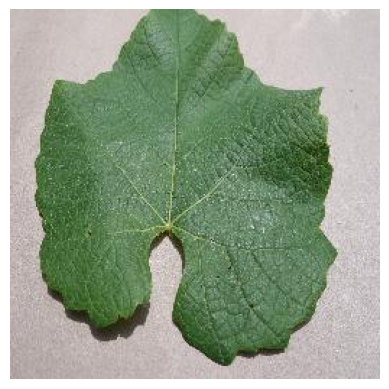

In [ ]:
image_path = '/content/plantvillage dataset/color/Grape___healthy/304f5d6d-b17f-4e89-9196-9e649f117d03___Mt.N.V_HL 6189.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[179 175 176]
  [181 177 178]
  [184 180 181]
  ...
  [115 112 105]
  [108 105  98]
  [101  98  91]]

 [[176 172 173]
  [177 173 174]
  [178 174 175]
  ...
  [113 110 103]
  [111 108 101]
  [109 106  99]]

 [[180 176 177]
  [180 176 177]
  [180 176 177]
  ...
  [108 105  98]
  [111 108 101]
  [114 111 104]]

 ...

 [[137 128 119]
  [131 122 113]
  [125 116 107]
  ...
  [ 74  65  48]
  [ 74  65  48]
  [ 73  64  47]]

 [[136 127 118]
  [132 123 114]
  [128 119 110]
  ...
  [ 77  69  50]
  [ 75  67  48]
  [ 75  67  48]]

 [[133 124 115]
  [133 124 115]
  [132 123 114]
  ...
  [ 81  73  54]
  [ 80  72  53]
  [ 79  71  52]]]


In [ ]:
# Image Parameters
img_size = 224
batch_size = 32

# Data Visualisation

In [ ]:
n =len(os.listdir('plantvillage dataset/color'))
type_of_leaves={}
for i in range(n):
  x=os.listdir('plantvillage dataset/color')[i]
  y=x.split('___')[0]
  if y not in type_of_leaves:
    type_of_leaves[y]=1
  else:
    type_of_leaves[y]+=1

all_types = type_of_leaves.keys()
all_types_count = type_of_leaves.values()

In [ ]:
print(all_types)
print(all_types_count)

dict_keys(['Tomato', 'Strawberry', 'Grape', 'Corn_(maize)', 'Orange', 'Potato', 'Blueberry', 'Soybean', 'Raspberry', 'Pepper,_bell', 'Cherry_(including_sour)', 'Apple', 'Peach', 'Squash'])
dict_values([10, 2, 4, 4, 1, 3, 1, 1, 1, 2, 2, 4, 2, 1])


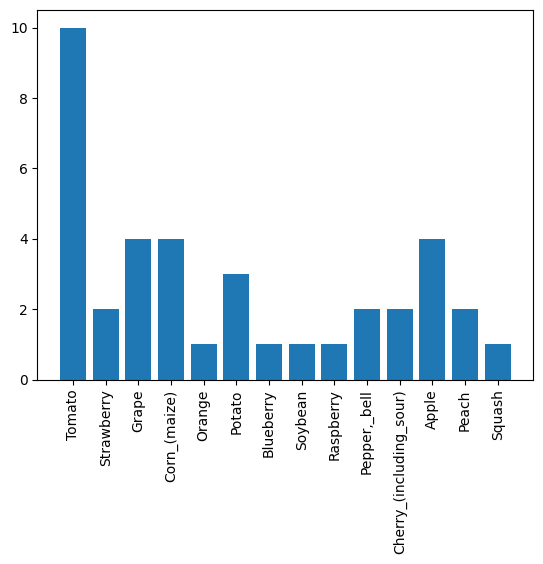

<Figure size 10000x1500 with 0 Axes>

In [ ]:
plt.bar(range(len(all_types)),list(all_types_count), align='center')
plt.xticks(range(len(all_types)), list(all_types), rotation=90)
plt.figure(figsize=(100,15))
plt.show()

In [ ]:
n1 =len(os.listdir('plantvillage dataset/color'))
type_of_leaves_count={}
for i in range(n1):
  x=os.listdir('plantvillage dataset/color')[i]
  y=x.split('___')[0]
  if y not in type_of_leaves_count:
    type_of_leaves_count[y]=len(os.listdir('plantvillage dataset/color/')[i])
  else:
    type_of_leaves_count[y]+=len(os.listdir('plantvillage dataset/color/')[i])

all_types_count_type = type_of_leaves_count.keys()
all_types_total = type_of_leaves_count.values()

In [ ]:
print(all_types_count_type)
print(all_types_total)

dict_keys(['Tomato', 'Strawberry', 'Grape', 'Corn_(maize)', 'Orange', 'Potato', 'Blueberry', 'Soybean', 'Raspberry', 'Pepper,_bell', 'Cherry_(including_sour)', 'Apple', 'Peach', 'Squash'])
dict_values([256, 44, 102, 134, 40, 57, 19, 17, 19, 51, 73, 74, 37, 23])


### Train Test Split

In [ ]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [ ]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [ ]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


## CNN-1

In [ ]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [ ]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

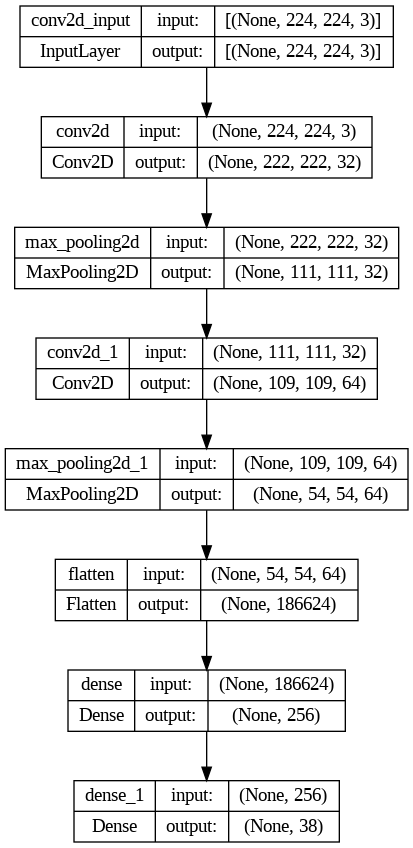

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Model Training

In [ ]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=10,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/10
1358/1358 [==============================] - 132s 93ms/step - loss: 0.9694 - accuracy: 0.7355 - val_loss: 0.4447 - val_accuracy: 0.8611
Epoch 2/10
1358/1358 [==============================] - 110s 81ms/step - loss: 0.2824 - accuracy: 0.9107 - val_loss: 0.4781 - val_accuracy: 0.8563
Epoch 3/10
1358/1358 [==============================] - 112s 83ms/step - loss: 0.1403 - accuracy: 0.9546 - val_loss: 0.4666 - val_accuracy: 0.8727
Epoch 4/10
1358/1358 [==============================] - 111s 82ms/step - loss: 0.0898 - accuracy: 0.9706 - val_loss: 0.4572 - val_accuracy: 0.8841
Epoch 5/10
1358/1358 [==============================] - 112s 82ms/step - loss: 0.0744 - accuracy: 0.9761 - val_loss: 0.5553 - val_accuracy: 0.8671
Epoch 6/10
1358/1358 [==============================] - 104s 77ms/step - loss: 0.0548 - accuracy: 0.9825 - val_loss: 0.7624 - val_accuracy: 0.8499
Epoch 7/10
1358/1358 [==============================] - 106s 78ms/step - loss: 0.0522 - accuracy: 0.9844 - val_loss: 0

### Model Evaluation

In [ ]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 [==============================] - 27s 80ms/step - loss: 0.7967 - accuracy: 0.8573
Validation Accuracy: 85.73%


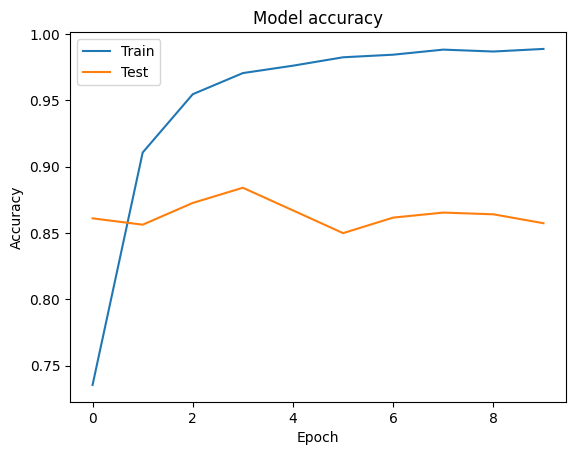

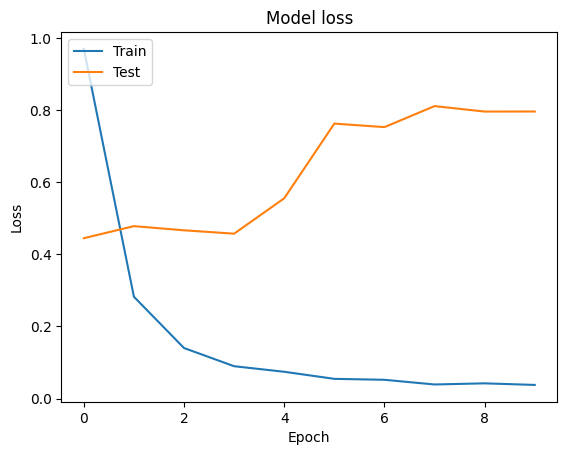

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Building a Predictive System

In [ ]:
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
# Example Usage
image_path = '/content/test_apple_black_rot.JPG'
#image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 [==============================] - 0s 275ms/step
Predicted Class Name: Apple___Black_rot


### Save the model to Google drive or local

In [ ]:
model.save('drive/MyDrive/plant_disease_prediction_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('plant_disease_prediction_model.h5')